> 

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#data cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> 
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.
● ‘ScheduledDay’ tells us on what day the patient booked their appointment.The ‘Neighborhood’ indicates the
location of the hospital.
‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
The last column of the dataset indicates ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up




> **Questions I seek to find answers through the exploratory analysis on this dataset are**:
1. How many patients attended or did not attend their appointment?.
2. What ages of patients attended their appointment or did not attend their appointments?.
3. Which Neighbourhoods (hospital locations) had both high patient-appointment attendance and low patient-appointment attendance?.
4. Did patients who received an SMS attend or not attend their appointment?.
5. Which Health Condition or Reason was most frequent in terms of patient-appointment attendance?.
6. What Scheduled Day Had the most Attendance of patient-appointments?
7. How many patients are enrolled or not enrolled in Brasilian Welfare Program Bolsa Familia?


##### Importing statements for all of the packages I plan to use and defining a function to minimize my codes

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)



In [2]:
def label(x,y,t):
    """
    Args:
    x (str): x-axis
    y (str): y-axis
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

<a id='wrangling'></a>
## Data Wrangling

#### Loading the data and print out a few lines. Perform operations to inspect data types, shape, info and look for instances of missing /possibly errant data or duplicated data


In [3]:

data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df = pd.DataFrame(data)



df.head(10)




PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5  9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6  7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7  3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8  5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9  7.812456e+13        5629123      F  2016-04-27T12:48:25Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5  2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   
6  2016-04-29T00:00:00Z   23         GOIABEIRAS            0             0   
7  2016-04-29T00:00:00Z   39         GOIABEIRAS            0             0   
8  2016-04-29T00:00:00Z   21         ANDORINHAS            0             0   
9  2016-04-29T00:00:00Z   19          CONQUISTA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No  
5         0           0        0             0      No  
6         0           0        0             0     Yes  
7         0           0        0             0     Yes  
8         0           0        0             0      No  
9         0           0        0             0      No

##### Number of columns and rows

In [4]:


df.shape

(110527, 14)

##### Checking which columns have missing values

In [5]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Further confirmation of no missing values

In [6]:


df.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

###### What are the datatypes in the dataset

In [7]:


df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

##### Are there duplicate enteries in the dataset?

In [8]:


sum(df.duplicated())

0

###### Is there a correlation in the data

In [9]:


df.corr()

PatientId  AppointmentID       Age  Scholarship  Hipertension  \
PatientId       1.000000       0.004039 -0.004139    -0.002880     -0.006441   
AppointmentID   0.004039       1.000000 -0.019126     0.022615      0.012752   
Age            -0.004139      -0.019126  1.000000    -0.092457      0.504586   
Scholarship    -0.002880       0.022615 -0.092457     1.000000     -0.019729   
Hipertension   -0.006441       0.012752  0.504586    -0.019729      1.000000   
Diabetes        0.001605       0.022628  0.292391    -0.024894      0.433086   
Alcoholism      0.011011       0.032944  0.095811     0.035022      0.087971   
Handcap        -0.007916       0.014106  0.078033    -0.008586      0.080083   
SMS_received   -0.009749      -0.256618  0.012643     0.001194     -0.006267   

               Diabetes  Alcoholism   Handcap  SMS_received  
PatientId      0.001605    0.011011 -0.007916     -0.009749  
AppointmentID  0.022628    0.032944  0.014106     -0.256618  
Age            0.292391    0.095811  0.078033      0.012643  
Scholarship   -0.024894    0.035022 -0.008586      0.001194  
Hipertension   0.433086    0.087971  0.080083     -0.006267  
Diabetes       1.000000    0.018474  0.057530     -0.014550  
Alcoholism     0.018474    1.000000  0.004648     -0.026147  
Handcap        0.057530    0.004648  1.000000     -0.024161  
SMS_received  -0.014550   -0.026147 -0.024161      1.000000


### Conclusion from Data Wranggling
> **Observation**: The Dataset has no column(s) with missing value(s).
There are not duplicate entries in the dataset.
The data types were float64, int64 and object.
In conclusion, the dataset has 14 columns and 10527 entries.


<a id='data cleaning'></a>
# Data Cleaning

> **Observation**:The column 'ScheduledDay' was a combination of Day and Time; hence I feel the column name should be changed from ScheduledDay to Scheduled_Day_Time instead.Again, AppointmentDay column was in datetime format which should not be so since it is supposed to be a date format. Also, Column AppointmentDay has Datetime instead of date only

#### Renaming column ScheduledDay to Scheduled_DayTime and changing Appointmentday (Datetime) to Date only

In [10]:

df.rename(columns={'ScheduledDay':'Scheduled_Day_Time',
                   'Hipertension':'Hypertension',
                   'Handcap':'Handicap'})
                


PatientId  AppointmentID Gender    Scheduled_Day_Time  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
2       2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
3       2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
4       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
...                      ...  ...                ...          ...   
110522  2016-06-07T00:00:00Z   56        MARIA ORTIZ            0   
110523  2016-06-07T00:00:00Z   51        MARIA ORTIZ            0   
110524  2016-06-07T00:00:00Z   21        MARIA ORTIZ            0   
110525  2016-06-07T00:00:00Z   38        MARIA ORTIZ            0   
110526  2016-06-07T00:00:00Z   54        MARIA ORTIZ            0   

        Hypertension  Diabetes  Alcoholism  Handicap  SMS_received No-show  
0                  1         0           0         0             0      No  
1                  0         0           0         0             0      No  
2                  0         0           0         0             0      No  
3                  0         0           0         0             0      No  
4                  1         1           0         0             0      No  
...              ...       ...         ...       ...           ...     ...  
110522             0         0           0         0             1      No  
110523             0         0           0         0             1      No  
110524             0         0           0         0             1      No  
110525             0         0           0         0             1      No  
110526             0         0           0         0             1      No  

[110527 rows x 14 columns]

In [11]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [12]:
df

PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

       AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0          2016-04-29   62    JARDIM DA PENHA            0             1   
1          2016-04-29   56    JARDIM DA PENHA            0             0   
2          2016-04-29   62      MATA DA PRAIA            0             0   
3          2016-04-29    8  PONTAL DE CAMBURI            0             0   
4          2016-04-29   56    JARDIM DA PENHA            0             1   
...               ...  ...                ...          ...           ...   
110522     2016-06-07   56        MARIA ORTIZ            0             0   
110523     2016-06-07   51        MARIA ORTIZ            0             0   
110524     2016-06-07   21        MARIA ORTIZ            0             0   
110525     2016-06-07   38        MARIA ORTIZ            0             0   
110526     2016-06-07   54        MARIA ORTIZ            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received No-show  
0              0           0        0             0      No  
1              0           0        0             0      No  
2              0           0        0             0      No  
3              0           0        0             0      No  
4              1           0        0             0      No  
...          ...         ...      ...           ...     ...  
110522         0           0        0             1      No  
110523         0           0        0             1      No  
110524         0           0        0             1      No  
110525         0           0        0             1      No  
110526         0           0        0             1      No  

[110527 rows x 14 columns]

<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1: How many patients attended or did not attend their appointment?

##### Investigating the count of whether a patient showed up for an appointent or not
*Visualizing the value counts of my findings with a bar graph, box graph to understand the figures in a graphical form

In [13]:

ax = df['No-show'].value_counts()
ax

No     88208
Yes    22319
Name: No-show, dtype: int64

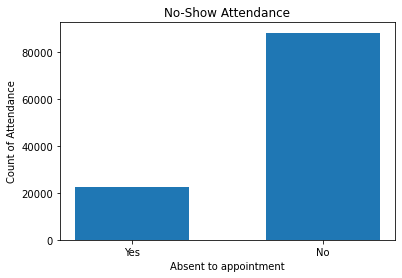

In [14]:
ax1 = np.array([22319,88208])
attendance =np.array(['Yes','No'])

plt.bar(attendance, ax1, width = 0.6)
label("Absent to appointment","Count of Attendance", "No-Show Attendance")

>From the count figures and the bar graph and , the "No" represents attendance to appointment while "Yes" represents absentism to appointment. Hence, it was found that 88208 patients attended their appointments (the highest fraction of patient population) while 22319 patients were absent for their appointment( the remaining fraction of the patient population)

##### Ploting a box graph

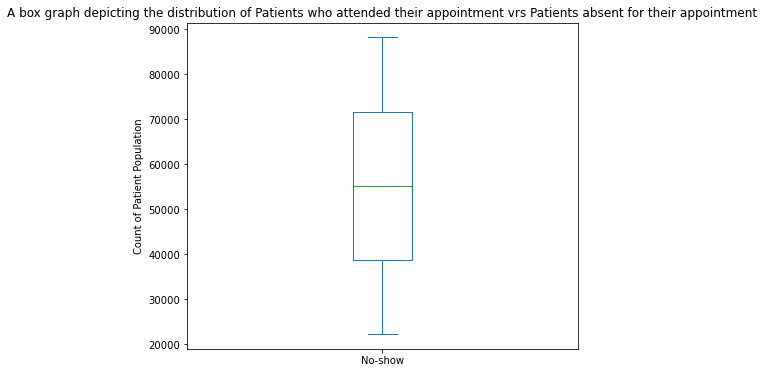

In [15]:


ax = df['No-show'].value_counts().plot(kind='box', figsize=(7,6))
label(" ", "Count of Patient Population", "A box graph depicting the distribution of Patients who attended their appointment vrs Patients absent for their appointment")

>The lower quartile of the box plot graph is represents the distribution of patient-appointments abseentism while the upper quartile represents the distrubution of patients who attended their appointments.

### Research Question 2:  What ages of patients attended their appointment or did not attend their appointments?

##### Filtering only patients who attended their appointment

In [16]:

attended = df[df["No-show"] == "No"]
attended.head(5)

PatientId  AppointmentID Gender          ScheduledDay AppointmentDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z     2016-04-29   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z     2016-04-29   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z     2016-04-29   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z     2016-04-29   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z     2016-04-29   

   Age      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0   62    JARDIM DA PENHA            0             1         0           0   
1   56    JARDIM DA PENHA            0             0         0           0   
2   62      MATA DA PRAIA            0             0         0           0   
3    8  PONTAL DE CAMBURI            0             0         0           0   
4   56    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

##### Filtering only patient records of patients who did not attend their appointment

In [17]:

not_attended = df[df["No-show"] == "Yes"]
not_attended.head(5)


PatientId  AppointmentID Gender          ScheduledDay AppointmentDay  \
6   7.336882e+14        5630279      F  2016-04-27T15:05:12Z     2016-04-29   
7   3.449833e+12        5630575      F  2016-04-27T15:39:58Z     2016-04-29   
11  7.542951e+12        5620163      M  2016-04-26T08:44:12Z     2016-04-29   
17  1.479497e+13        5633460      F  2016-04-28T09:28:57Z     2016-04-29   
20  6.222575e+14        5626083      F  2016-04-27T07:51:14Z     2016-04-29   

    Age   Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
6    23      GOIABEIRAS            0             0         0           0   
7    39      GOIABEIRAS            0             0         0           0   
11   29  NOVA PALESTINA            0             0         0           0   
17   40       CONQUISTA            1             0         0           0   
20   30  NOVA PALESTINA            0             0         0           0   

    Handcap  SMS_received No-show  
6         0             0     Yes  
7         0             0     Yes  
11        0             1     Yes  
17        0             0     Yes  
20        0             0     Yes

##### Visualizing Ages of patients who did not show-up for their appointment

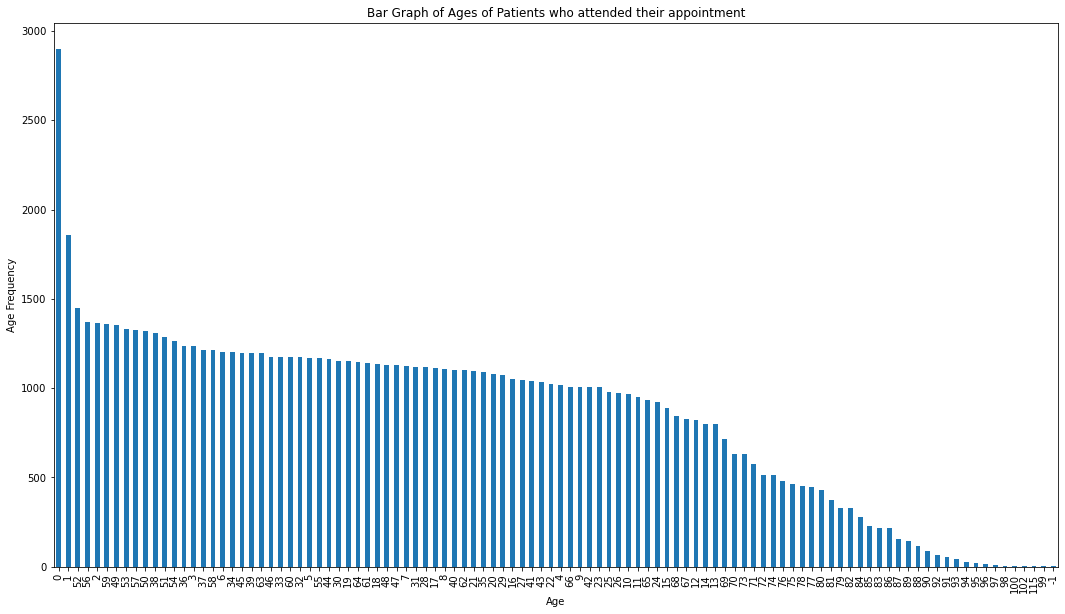

In [18]:

attended.Age.value_counts().plot(kind='bar', figsize=(18,10))
label("Age","Age Frequency", "Bar Graph of Ages of Patients who attended their appointment")

> The bar graph illustrates the cumulative frequency visualization of ages of patients who attended their appointments. From the graph, it can be identified that patients with age 0 were the highest age group of patients who attended their appointment, followed by ages 1, 52, 56,2 ,59, 49, to mention but a few respectively. However, this finding leads to another question of "were the patients of age 0 newly born babies or it is an error age input from the data.

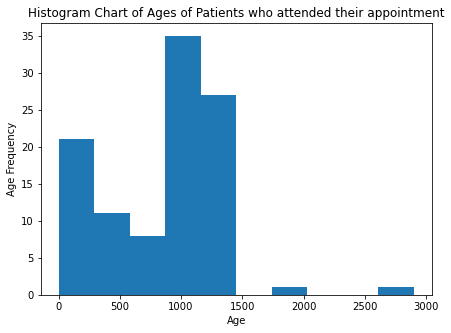

In [19]:
attended.Age.value_counts().plot(kind='hist', figsize=(7,5))
label("Age","Age Frequency", "Histogram Chart of Ages of Patients who attended their appointment")

> The Histogram graph gives us an idea of the center and spread of the data. From this graph, data is skewed to the right positive indicates a positive distribution.

###### Visualizing Ages of patients who showed up for their appointment

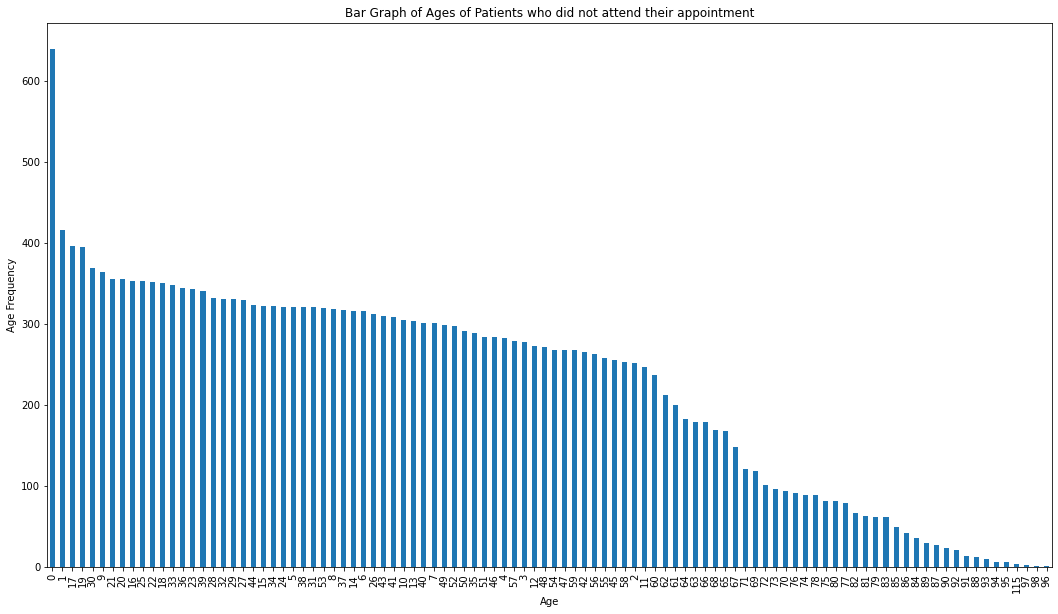

In [20]:


not_attended.Age.value_counts().plot(kind='bar', figsize=(18,10))
label("Age","Age Frequency", "Bar Graph of Ages of Patients who did not attend their appointment")

>The bar graph illustrates the cumulative frequency visualization of ages of patients who did not attend their appointments. From the graph, it can be identified that patients with age 0 were the highest age group of patients who did not attended their appointment, followed by ages 1, 17, 19, 30 ,9, 21, to mention but a few respectively. 

##### Ploting a histogram to visualise ages with high appointment absentism

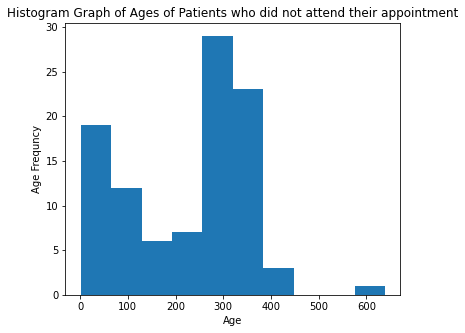

In [21]:
not_attended.Age.value_counts().plot(kind='hist', figsize=(6,5))
label("Age","Age Frequncy", "Histogram Graph of Ages of Patients who did not attend their appointment")

>From this graph, data is skewed to the right positive indicating  a positive distribution.

### Research Question 3:  Which Neighbourhoods (hospital locations) had both high patient-appointment attendance and low patient-appointment attendance?

#### Ploting a bar chart to visualize the attendace in neighbouring hospitals

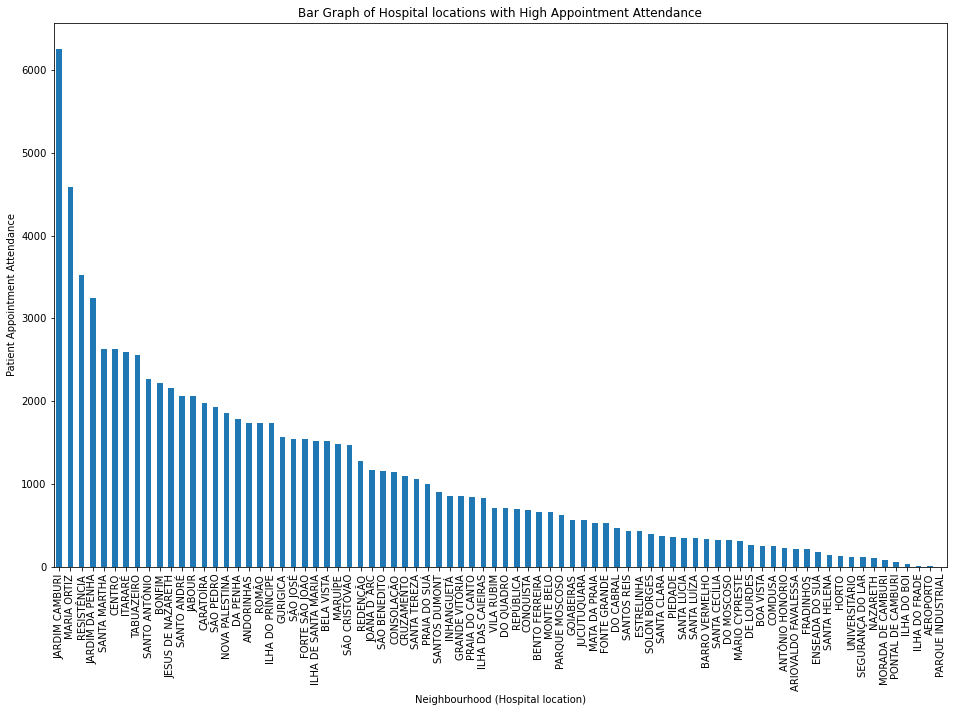

In [22]:
attended['Neighbourhood'].value_counts().plot(kind='bar', figsize=(16,10))
label("Neighbourhood (Hospital location)","Patient Appointment Attendance", "Bar Graph of Hospital locations with High Appointment Attendance")

 >The Bar graph viusalizes the Neighbourhood (Hospital Location) against Patient Appointment Attendance. From the garph, Jardim Camburi was identified as the Neighbourhood which recoreded the highest attendance of patient appointments, followed by Maria Ortiz, Resistencia, Jardim Da Penda, to mention but a few; respectively.

##### Ploting a Line graph

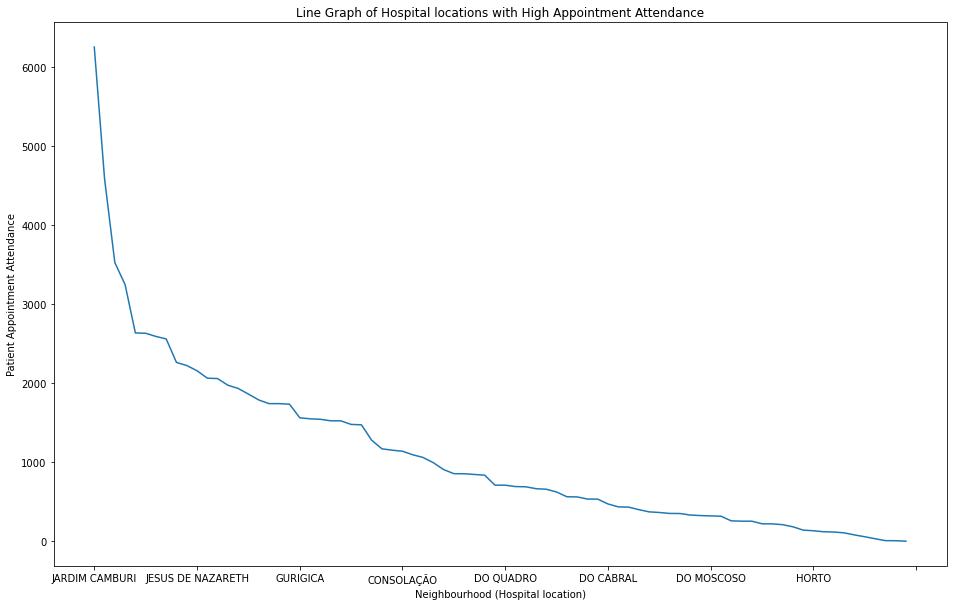

In [23]:

attended['Neighbourhood'].value_counts().plot(kind='line', figsize=(16,10))
label("Neighbourhood (Hospital location)","Patient Appointment Attendance", "Line Graph of Hospital locations with High Appointment Attendance")

>The line graph depicts the continous fall in numbers of attendance to appointments across the Hospital locations in Brasil. From the graph, it can be identified that the fall in number of attendances to appointment was very sharp from Jardim camburi to Jesus De Nazareth.

###### Ploting a histogram to understand the finding

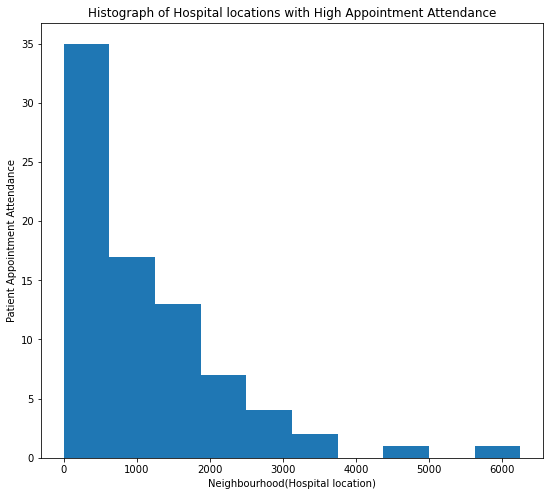

In [24]:

attended['Neighbourhood'].value_counts().plot(kind='hist', figsize=(9,8))
label("Neighbourhood(Hospital location)","Patient Appointment Attendance", "Histograph of Hospital locations with High Appointment Attendance")

>From the Histogram, most of the data values occur on the left side with decreasing data on the right side of the graph

##### Hospital Locations with High  (absentism) Patient-appointment attendance

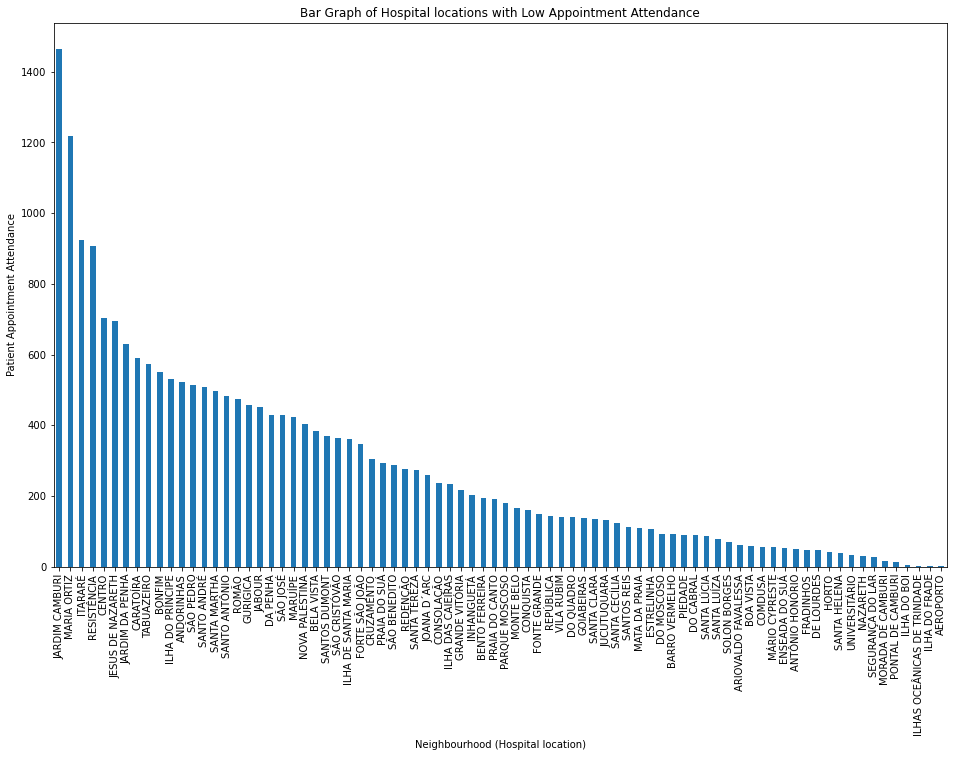

In [25]:

not_attended['Neighbourhood'].value_counts().plot(kind='bar', figsize=(16,10))
label("Neighbourhood (Hospital location)","Patient Appointment Attendance", "Bar Graph of Hospital locations with Low Appointment Attendance")


>From this graph, Jardim Camburi recorded the highest count of patient-appointment absentism, followed by Maria Ortiz, Itarare, Resistencis, Centro, to mention but a few. It was also discovered that five hospital locations (namely:Jardim Camburi, Maria Ortiz, Resistencia, Centro and Jesus De Nazareth) which were among the top 7 hospital locations with the highest count of appointment attendance, are also among the top 7 hospital location which recoreded high patient appointment absentism.

##### Ploting a histogram to understand Neigbourhood with high patient-apointment absentism

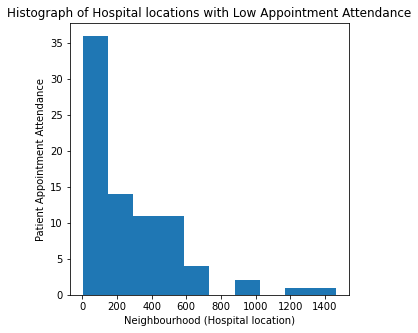

In [26]:
not_attended['Neighbourhood'].value_counts().plot(kind='hist', figsize=(5,5))
label("Neighbourhood (Hospital location)","Patient Appointment Attendance", "Histograph of Hospital locations with Low Appointment Attendance")

>The histogram is skewed the left which indicates that most of the data values occur on the left side with decreasing data on the right side of the graph

##### Hospital with absence in attendance --- line graph

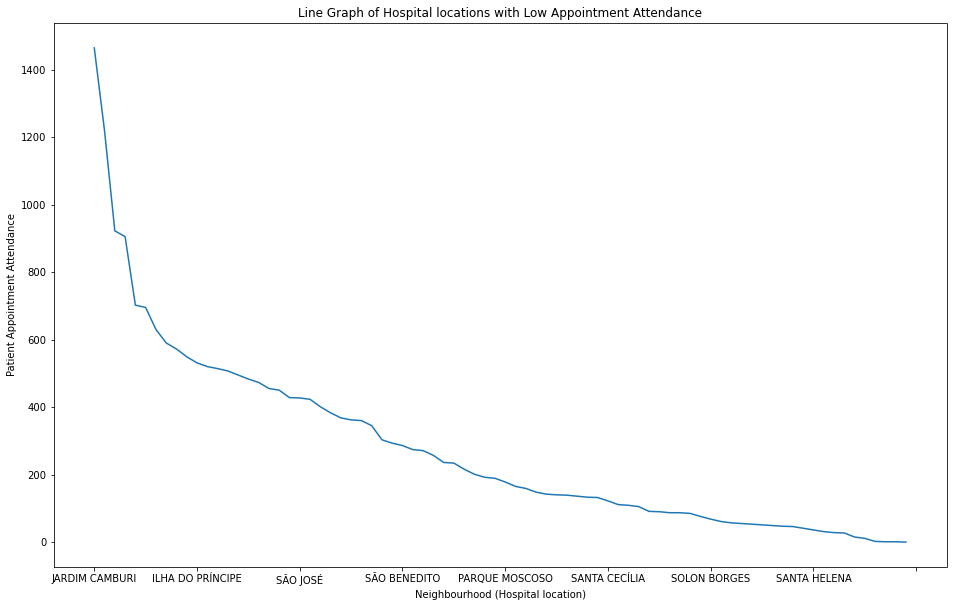

In [27]:

not_attended['Neighbourhood'].value_counts().plot(kind='line', figsize=(16,10))
label("Neighbourhood (Hospital location)","Patient Appointment Attendance", "Line Graph of Hospital locations with Low Appointment Attendance")

> The line graph indicates the nature of the fall of non-attendance in appointments across the Hospital locals in Brasil; from Jardim Camburi to Santa Helena.

### Research Question 4:  Did patients who received an SMS attend or not attend their appointment?

##### Filtering out Patients whon received SMS from Patients who did not receive SMS

In [28]:

total_sms= df[df['SMS_received']==1]
receive_sms = attended[attended["SMS_received"] == 1]
no = df[df['SMS_received']==0]
nots= not_attended[not_attended['SMS_received']==1]

##### Taking a look at the shapes of the variables I declared

In [29]:
total_sms.shape, receive_sms.shape, no.shape, nots.shape

((35482, 14), (25698, 14), (75045, 14), (9784, 14))

##### Investigating to see if some patients received an sms but did not attend their appointment

In [30]:
sms_not_attend= receive_sms[receive_sms["No-show"] == "Yes"]
sms_not_attend.head(5)

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

##### Exploring to see if there were patients who received an sms and attended their appointment

In [31]:
sms_attend= receive_sms[receive_sms["No-show"] == "No"]
sms_attend.head(6)

PatientId  AppointmentID Gender          ScheduledDay AppointmentDay  \
15  9.994839e+10        5620206      F  2016-04-26T08:47:27Z     2016-04-29   
18  1.713538e+13        5621836      F  2016-04-26T10:54:18Z     2016-04-29   
25  5.819370e+12        5624020      M  2016-04-26T15:04:17Z     2016-04-29   
33  7.653517e+12        5616921      F  2016-04-25T15:01:04Z     2016-04-29   
38  5.873316e+12        5609446      M  2016-04-20T15:54:18Z     2016-04-29   
46  1.379437e+11        5615608      M  2016-04-25T12:44:36Z     2016-04-29   

    Age   Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
15   15  NOVA PALESTINA            0             0         0           0   
18   30  NOVA PALESTINA            1             0         0           0   
25   46       CONQUISTA            0             1         0           0   
33   38   SÃO CRISTÓVÃO            1             0         0           0   
38   85   SÃO CRISTÓVÃO            0             1         0           0   
46   58   SÃO CRISTÓVÃO            0             1         0           1   

    Handcap  SMS_received No-show  
15        0             1      No  
18        0             1      No  
25        0             1      No  
33        0             1      No  
38        0             1      No  
46        0             1      No

##### Investigating to see if some patients did not receive an sms but attended their appointments and taking a looking the shape of the variables I declared

In [32]:

nosms_attend = attended[attended["SMS_received"] == 0]
nosms_attend.head(5)

PatientId  AppointmentID Gender          ScheduledDay AppointmentDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z     2016-04-29   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z     2016-04-29   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z     2016-04-29   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z     2016-04-29   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z     2016-04-29   

   Age      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0   62    JARDIM DA PENHA            0             1         0           0   
1   56    JARDIM DA PENHA            0             0         0           0   
2   62      MATA DA PRAIA            0             0         0           0   
3    8  PONTAL DE CAMBURI            0             0         0           0   
4   56    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

In [33]:
receive_sms.shape, sms_attend.shape, sms_not_attend.shape, nosms_attend.shape

((25698, 14), (25698, 14), (0, 14), (62510, 14))

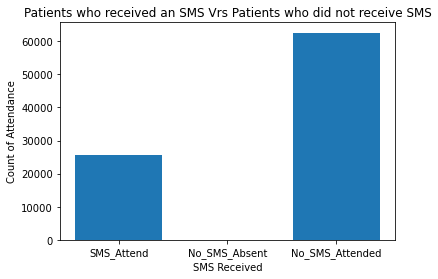

In [34]:
ax5 = np.array([25698,0,62510])
sms_receive =np.array(['SMS_Attend','No_SMS_Absent','No_SMS_Attended'])

plt.bar(sms_receive, ax5, width = 0.8)
label("SMS Received","Count of Attendance", "Patients who received an SMS Vrs Patients who did not receive SMS")

>From the bar chart, all patients who received SMS attended their appointments while some patients who also did nto receive SMS also attended their appointment. Morever, there were patients who did not receive SMS and did not show up for their appointment.

### Research Question 5:  Which Health Condition or Reason was most frequent in terms of patient-appointment attendance?

##### Investigating the type of appointment which had the highest show-up count

In [35]:


Alcoholism = attended[attended["Alcoholism"] == 1]
Handicap = attended[attended["Handcap"] == 1]
Hypertension = attended[attended["Hipertension"] == 1]
Diabetes = attended[attended["Diabetes"] == 1]


###### Gaining some details (number of columns and rows) of each reason or appointment type

In [36]:


Alcoholism.shape,Hypertension.shape,Handicap.shape,Diabetes.shape

((2683, 14), (18029, 14), (1676, 14), (6513, 14))

##### Visualizing the appointment type or reason for appointment

In [37]:

chart_reasons = pd.DataFrame({'Health Condition':['Alcoholism', 'Hypertension', 'Handicap', 'Diabetes'],
                              'Cumulative_Frequency':[677, 3772, 366,1420]})

##### ploting a cumulative bargraph to understand the counts

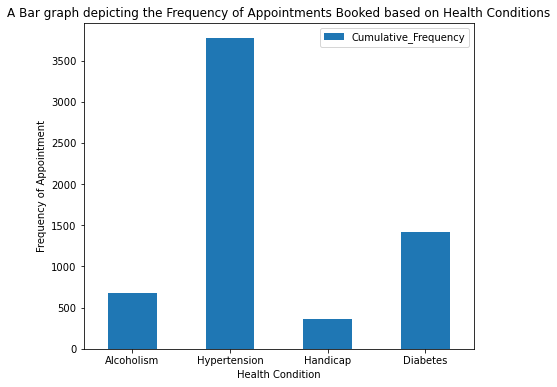

In [38]:


ax = chart_reasons.plot.bar(x='Health Condition', y='Cumulative_Frequency', rot=0, figsize=(7,6))
label("Health Condition", "Frequency of Appointment", "A Bar graph depicting the Frequency of Appointments Booked based on Health Conditions")



> From the bar plot, appointments on Hypertension recorded the highest count of attendances, followed by appointments on Diabetes, appointments on Alcoholism and appointments of Handicap.

##### Ploting a scatter graph to visual the finding

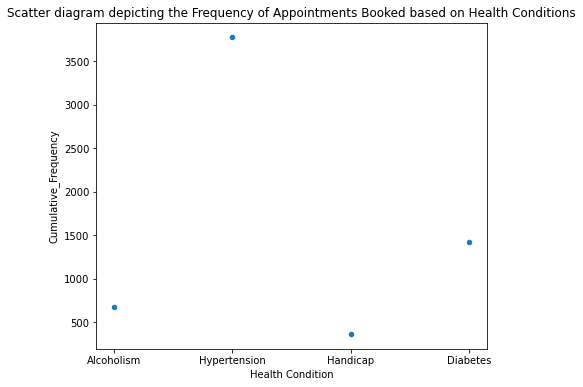

In [39]:


ax = chart_reasons.plot.scatter(x='Health Condition', y='Cumulative_Frequency', rot=0, figsize=(7,6))
label( "Health Condition", "Cumulative_Frequency", "Scatter diagram depicting the Frequency of Appointments Booked based on Health Conditions")

>The scatter plots was to primarily help us to observe and show relationships between the attendances of the various health conditions appointments. From the scatter plot, there is no relationship between the attendances of the  health conditions since the data points are far apart from each other.

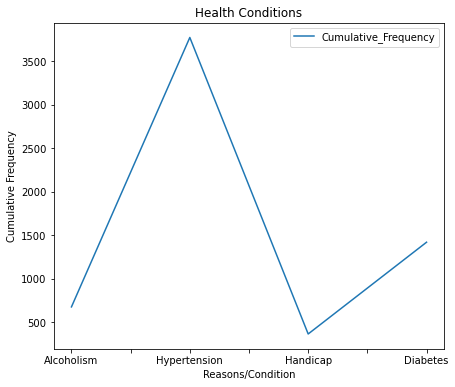

In [40]:

ax = chart_reasons.plot.line(x='Health Condition', y='Cumulative_Frequency', rot=0, figsize=(7,6))
label("Reasons/Condition", "Cumulative Frequency", "Health Conditions")


> The line graph shows the nature of the relationship between the various appointments. Since it is not a straight line, it can be concluded that there is no direct relations between the attendances of the various health conditions.  

###  Research Question 6:  What Scheduled Day Had the most Attendance of patient-appointments?

###### Exploring the date (days) which recorded the highest attendance in appointments

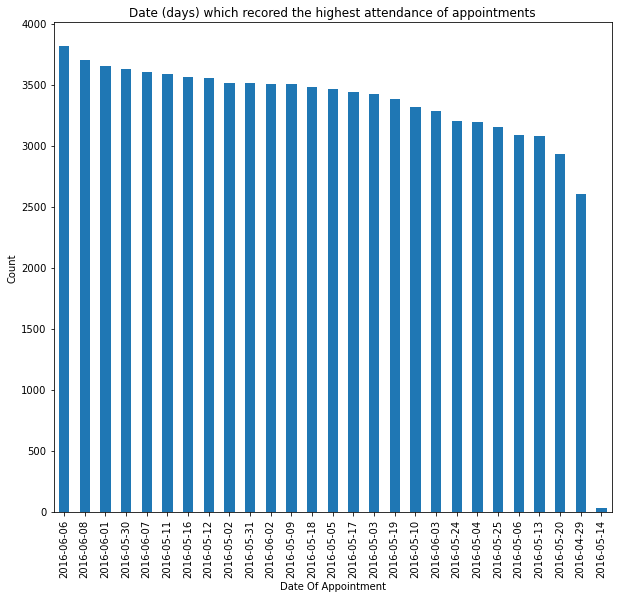

In [41]:

attended['AppointmentDay'].value_counts().plot(kind='bar', figsize=(10,9))
label("Date Of Appointment", "Count", "Date (days) which recored the highest attendance of appointments")

> The bar plot depicts date of appointment against the number of appointments scheduled by patients.From the bar graph of Appointment Days attended, 2016-05-16 had the higgest number of patients attending their appointments, followed by the 2016-05-08, 2016-05-01, 2016-05-30, 2016-06-07, to mention a few as shown in the graph.

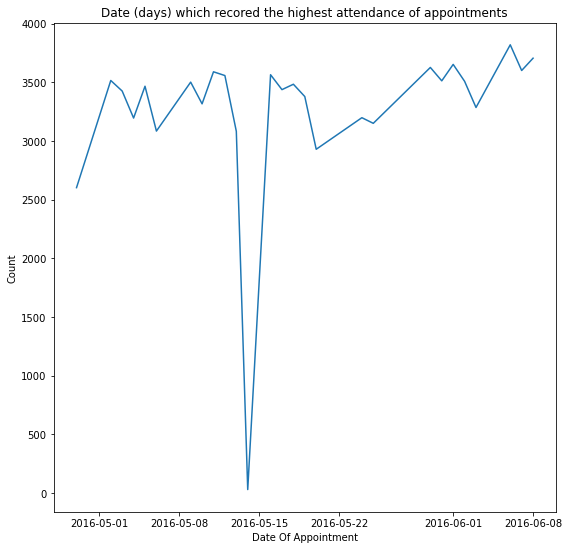

In [42]:
attended['AppointmentDay'].value_counts().plot(kind='line', figsize=(9,9))
label("Date Of Appointment", "Count", "Date (days) which recored the highest attendance of appointments")


>The line graph depicts the nature of appointment bookings/ schedules booked by patients on particaular days. From the plot, it can be seen that there was a steep drop in appointment attendances between 2016-05-08 to 2016-05-15 and a steady rise in attendances from 2016-05-15 to 2016-06-08

### Research Question 7:  How many patients are enrolled or not enrolled in Brasilian Welfare Program Bolsa Familia?

##### Filtering only records that have Scholarship value as 1 (meaning enrolled in the scholarship)

In [43]:


enrolled = df[df["Scholarship"] == 1]
enrolled['Scholarship'].value_counts()

1    10861
Name: Scholarship, dtype: int64

##### Filtering only records that have Scholarship value as 0 (meaning not enrolled in the scholarship)

In [44]:

unerolled = df[df["Scholarship"] == 0]
unerolled['Scholarship'].value_counts()

0    99666
Name: Scholarship, dtype: int64

##### Visualising a bar graph of the count of patients enrolled in the scholarship vrs patients not enrolled in the scholarship

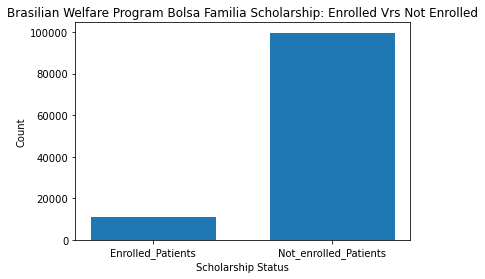

In [45]:

scholarship = np.array([10861, 99666])
ax4 = np.array(['Enrolled_Patients','Not_enrolled_Patients'])

plt.bar(ax4, scholarship, width = 0.7)
label("Scholarship Status","Count", "Brasilian Welfare Program Bolsa Familia Scholarship: Enrolled Vrs Not Enrolled")

>From bar plot, the count of patients enrolled in the Scholarship was lesser (10861 patients enrolled) as compared to the number of patients not enrolled in the scholarship (99666 patients not enrolled)

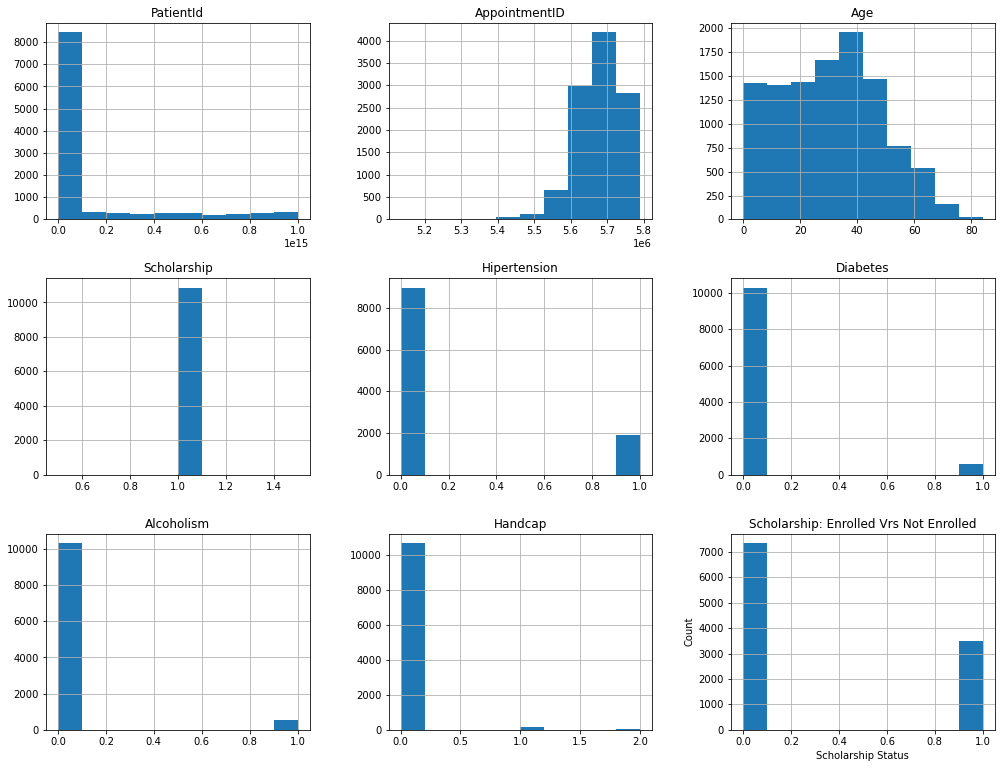

In [46]:
enrolled.hist(figsize=(17,13))
label("Scholarship Status","Count", "Scholarship: Enrolled Vrs Not Enrolled")

>From the group of histogram plots, the age histogram is more skewed to the left which may indicate that more younger people are enrolled in the scholarship than older people

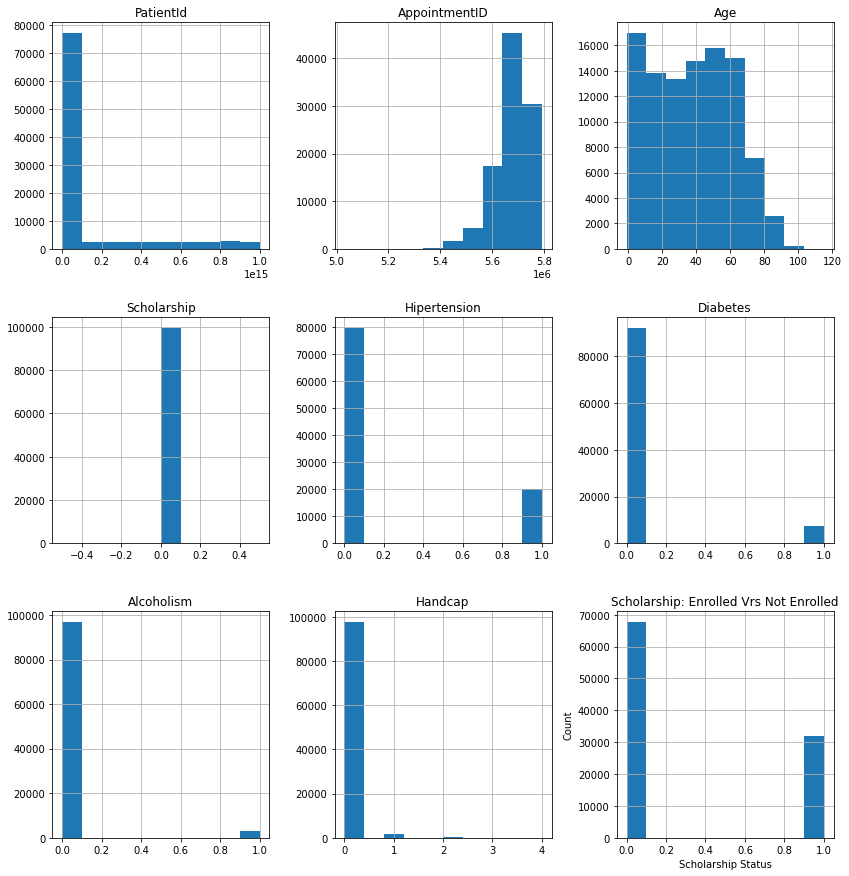

In [47]:
unerolled.hist(figsize=(14,15))
label("Scholarship Status","Count", "Scholarship: Enrolled Vrs Not Enrolled")

>From the histogram plots, it can be noticed from the age histogram plot that the graph is skewed to the left which might indicate that a bigger fraction of patients who are not enrolled in the scholarship are youth (youth) below 60 years.

## Research Question 8:  Are no-show appointments associated with a certain gender

####  Finding relation between No-show and Gender using a scatter graph

In [48]:

df = px.data.iris()
fig = px.scatter(data, x="No-show", y="Gender", color='Neighbourhood', title="How No-show appointments is associated with gender")
fig.show()

>From the scatter diagram which was ploted to explore the relation between how no-show appoints are associtated to gender, there was not clearly a relationship but from the data points, it indicates that Jardin De Penha has a relationship between all the gender ( male and female) of patients who attended their appointments and all the genders of patients who did not attend their appointments.

<a id='conclusions'></a>
## Conclusions




> **Research Question 1: How many appiontments did patients "show up" or  "not show up")**: 
<br>
From the findings of exploring the dataset, the count of patients who attended their appointment were 88208 while the count of patients who did not attend their appointment were 22319.



> **Research Question 2 (What age group (Patient's ages) attended their appointment)**: 
<br>
 *1.From the findings of exploring the dataset, patients of age 0 were the highest age group of patients who attended their appointments, followed by patients of ages 1 and the other ages groups as shown in the graph.
 *2.From the second bar graph, it was also observed that patients of ages 0 had had the highest count of patients who did not attend their appointment. This finding needed further exploration but could not do so due to my insufficient knowledge of how to delve deeper into finding as to why age 0 recoreded the highest count for both attendance and absentism.
 
 
 

>**Research Question 3 (Which Neighbourhood had most patients attending their appointments)**:
<br>
From exploratory analysis based on thos question, it was found that Jardim Camburi Neighbourhood (hospital location) recorded the highest count of patients that attended their appointments, followed by Maria Ortiz, Itarare, Resistencia, Centro, Jesus De Nazareth, Jardim Da Penha (and the list continues down to the neighbourhood with the least patient-appointment attendance).Again, from the second bar graph which visualizes the neighbourhoods where patients did not attend their appointment. It was found that hospital location in Jardim Camburi also has the highest count of patients who did not attend their appointment, followed by Maria Ortiz, Resistencia, Jardim Da Penha, Santa Martha, Centro, Itarare (the list goes on to the neighbourhood with least patient's appointment attendance according to the graph).


>**Research Question 4:  Did patients who received an SMS attend their appointment**:
<br>
From the exploratory analysis, the total count of SMS received was 35,482. It was found that 25,698 patients who received SMS attended their appointment while 9,784 patients who also received an SMS did not attend their appointment. Again, 62,510 patients of the patients who attended their appointments did not receive and sms.(Total count of appointments attendance was 88,208)


>**Research Question 5:  Which Health Condition/Reason was had most appointment attendance**:
<br>
From the exploratory analysis, the bar graph indicates the appointment type that was most attended out of all the appointments; Appointments on Hypertention recorded the highest attendance, followed by Diabetes appointment, Alcoholism appointment and Handicap appointments respectively.


>**Research Question 6:  Which Health Condition/Reason was had most appointment attendance**:
<br>
From the bar graph of Appointment Days attended, 2016-05-16 had the higgest number of patients attending their appointments, followed by the 2016-05-08, 2016-05-01, 2016-05-30, 2016-06-07, to mention a few as shown in the graph.

>**Research Question 7:  How many patients are enrolled or not enrolled in Brasilian Welfare Program Bolsa Familia?**:
<br>
From the exploratory analysis, it was found that 10861 patients are enrolled in the Brasilian Welfare Program Bolsa Familia Scholarship while 99666 patients are not not enrolled in the Scholarship.


>**Research Question 8:  Are no-show appointments associated with a certain gender**
<br>
From the scatter graph visualization in question 8, Jardim De Penha was the relation between no-show appointments and genders of both males and female patients.












<a id='limitations'></a>
## Limitations

>My project work had limitations in the exploratory analysis due to insufficent knowledge on how to delve deeper into the questions I seek to answer in the project. For example, most of the exploratory analysis  performed on questions 2 and question 6 were shallow. Question 2  for instance, posed a challenge as to why there was age 0 as both age of patients who attended their appointments (highest count of attendance of appointment) and the age of most patients who did not attend their appointment (highest count of non-attendance of appointment).

<a id='references'></a>
## References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

https://www.geeksforgeeks.org/how-to-convert-datetime-to-date-in-pandas/

https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp

https://www.tutorialspoint.com/plotly/plotly_plotting_inline_with_jupyter_notebook.htm